In [11]:
import pandas as pd
import numpy as np

# Adım 1: Veriyi oku
data = pd.read_csv("temizlenmis_veri.csv")


In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
# Adım 2: '?' olanları NaN yap ve satırları düşür
# Özellikler ve hedef değişkeni ayır
X = data.drop(columns=['survival_status'])
y = data['survival_status']

# '?' karakterlerini np.nan yap
X = X.replace('?', np.nan)

# Kategorik (string) verileri Label Encode et
for column in X.columns:
    if X[column].dtype == 'object':
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column].astype(str))

# Eksik verileri ortalama ile doldur
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# Adım 5: Veriyi eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Adım 6: SVM modelini oluştur ve eğit
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Adım 7: Tahmin yap ve doğruluk oranını yazdır
y_pred = svm_model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("SVM Model Doğruluk Oranı: %", round(accuracy * 100, 2))

SVM Model Doğruluk Oranı: % 86.84


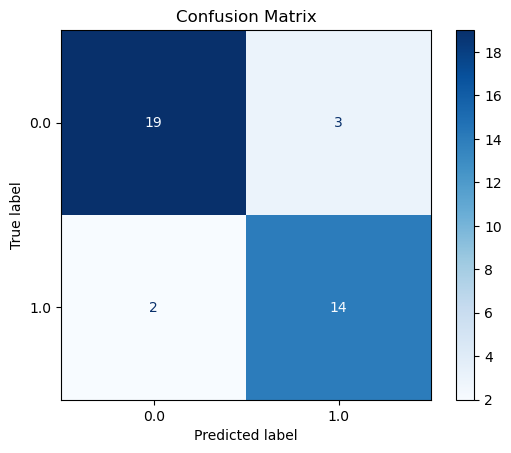

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [27]:
import pickle

# Modeli kaydet
with open("SVM_model.pkl", "wb") as f:
    pickle.dump(svm_model, f)